# APIs

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA, NMF
from sklearn.neighbors import KNeighborsClassifier

# UDFs

In [25]:
# function for a scatter plot with labels
def plot_scatter(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    for label, marker, color in zip(np.unique(y), ['o', '^'], ['r', 'b']):
        ax.scatter(X[y==label, 0], X[y==label, 1], marker=marker, c=color, edgecolors='black', s=40, label=f'Class {label}')

In [74]:
def plot_scatter_pca(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    for label in np.unique(y):
        ax.scatter(X[y==label, 0], X[y==label, 1], s=50)

In [90]:
# from mglearn/datasets.py
from scipy import signal
def make_signals():
    # fix a random state seed
    rng = np.random.RandomState(42)
    n_samples = 2000
    time = np.linspace(0, 8, n_samples)
    # create three signals
    s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
    s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
    s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

    # concatenate the signals, add noise
    S = np.c_[s1, s2, s3]
    S += 0.2 * rng.normal(size=S.shape)

    S /= S.std(axis=0)  # Standardize data
    S -= S.min()
    return S

# Preprocessing

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [3]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)
X_train_scaled = mmscaler.transform(X_train)

In [5]:
print(f'Min and Max values for each feature after scaling')
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

Min and Max values for each feature after scaling
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Applying transform on X_test and checking values

In [6]:
X_test_scaled = mmscaler.transform(X_test)
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


# PCA

## Visualizing features

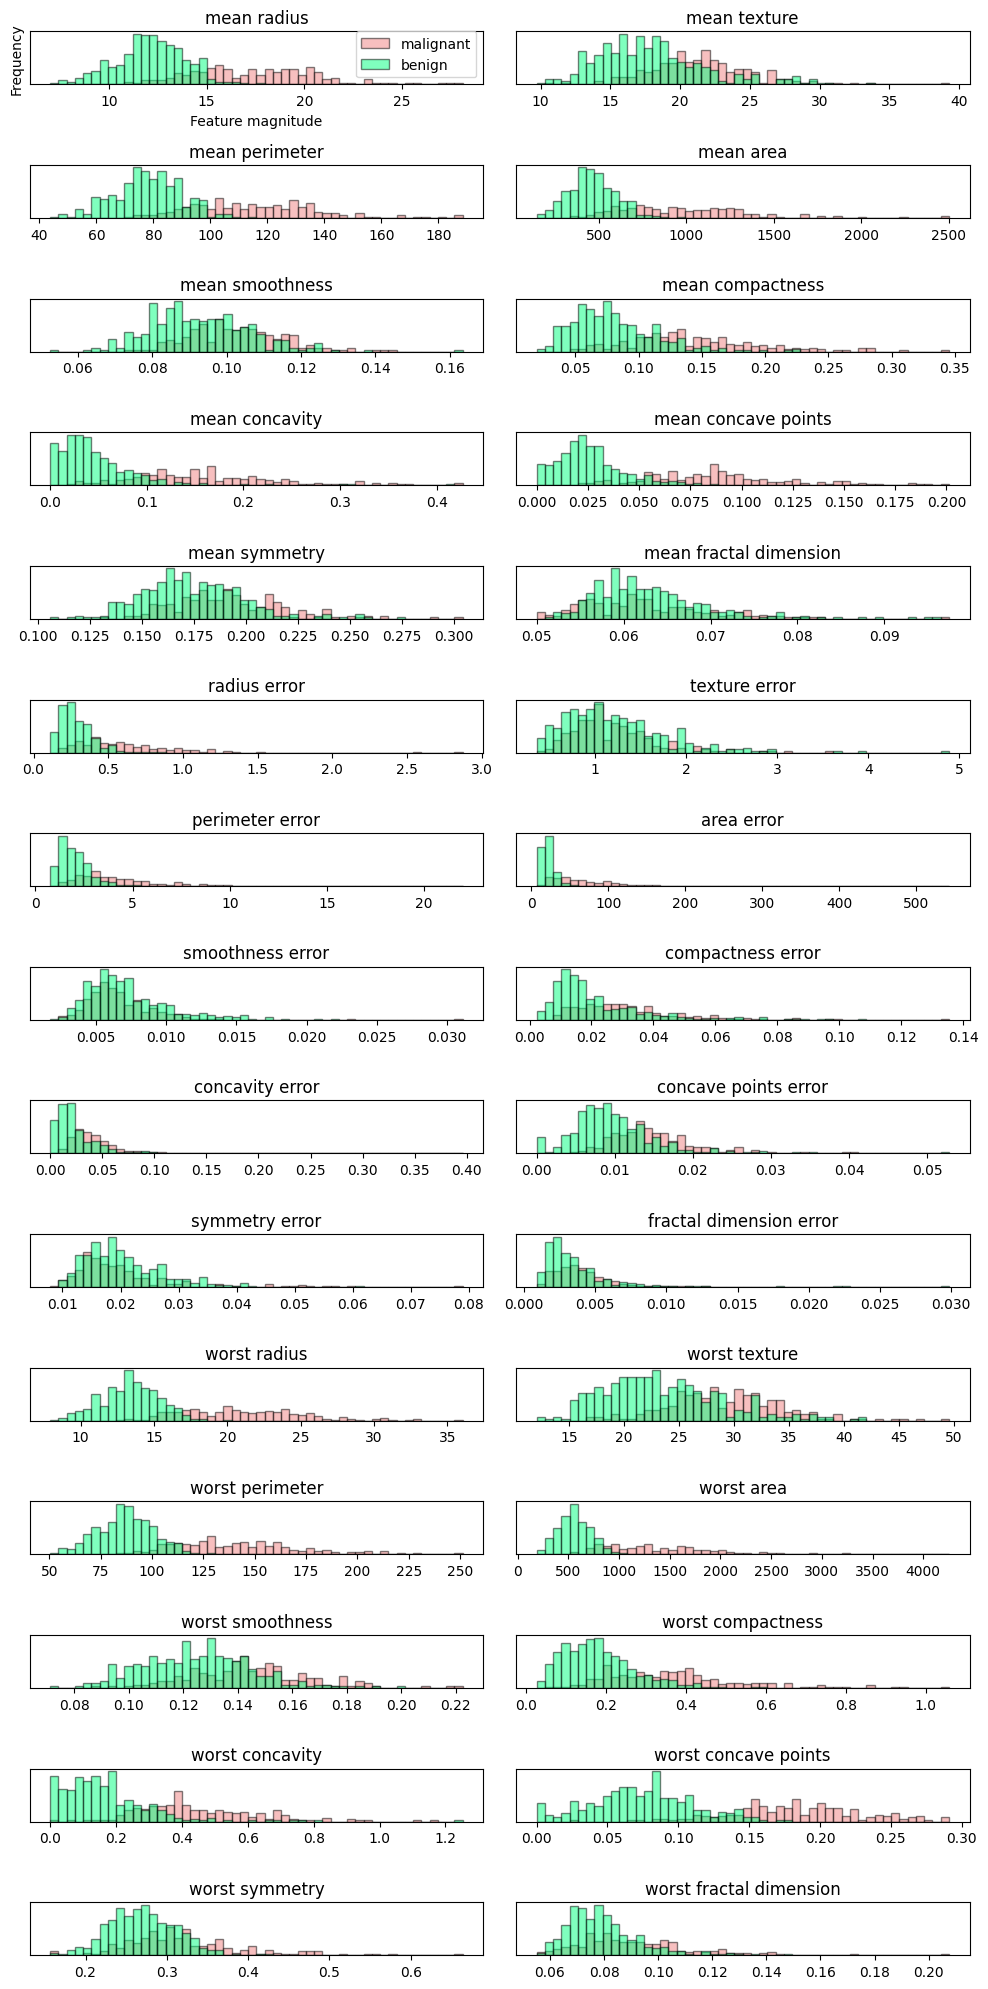

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='lightcoral', alpha=0.5, edgecolor='black')
    ax[i].hist(benign[:, i], bins=bins, color='springgreen', alpha=0.5, edgecolor='black')
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()


## Applying StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

## Applying PCA

In [18]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [19]:
X_pca = pca.transform(X_scaled)
print(f'Original shape: {X_scaled.shape}')
print(f'Reduced shape: {X_pca.shape}')

Original shape: (569, 30)
Reduced shape: (569, 2)


## Plotting principal components

### PC Plot

Text(0, 0.5, 'second PC')

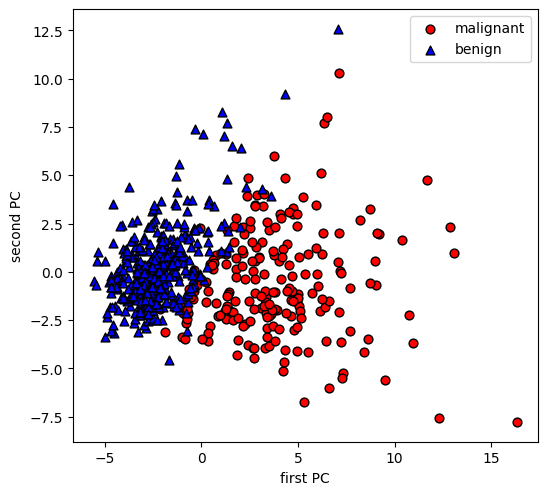

In [26]:
plt.figure(figsize=(6,6))
plot_scatter(X_pca, cancer.target)
plt.legend(cancer.target_names)
plt.gca().set_aspect('equal')
plt.xlabel('first PC')
plt.ylabel('second PC')


In [27]:
print(f'principal component shape: {pca.components_.shape}')

principal component shape: (2, 30)


In [28]:
print(f'Principal Components:\n{pca.components_}')

Principal Components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### Visualizing component loadings

Text(0, 0.5, 'Principal components')

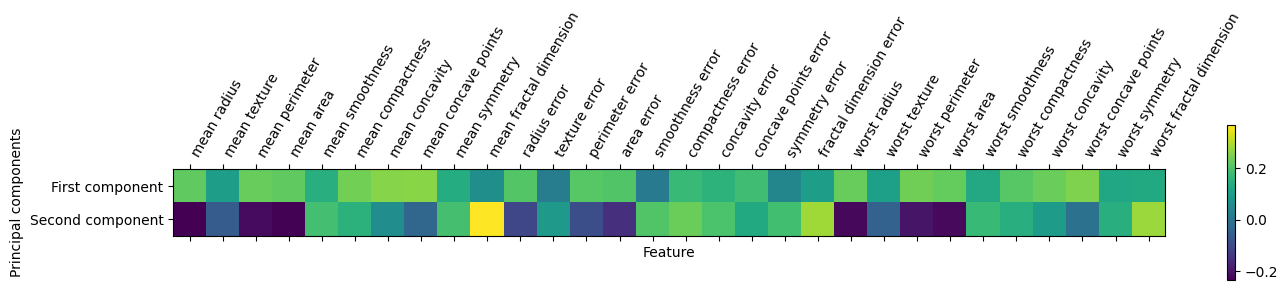

In [36]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

# Eigenfaces for feature extraction

In [37]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)


In [39]:
image_shape = people.images[0].shape
image_shape

(87, 65)

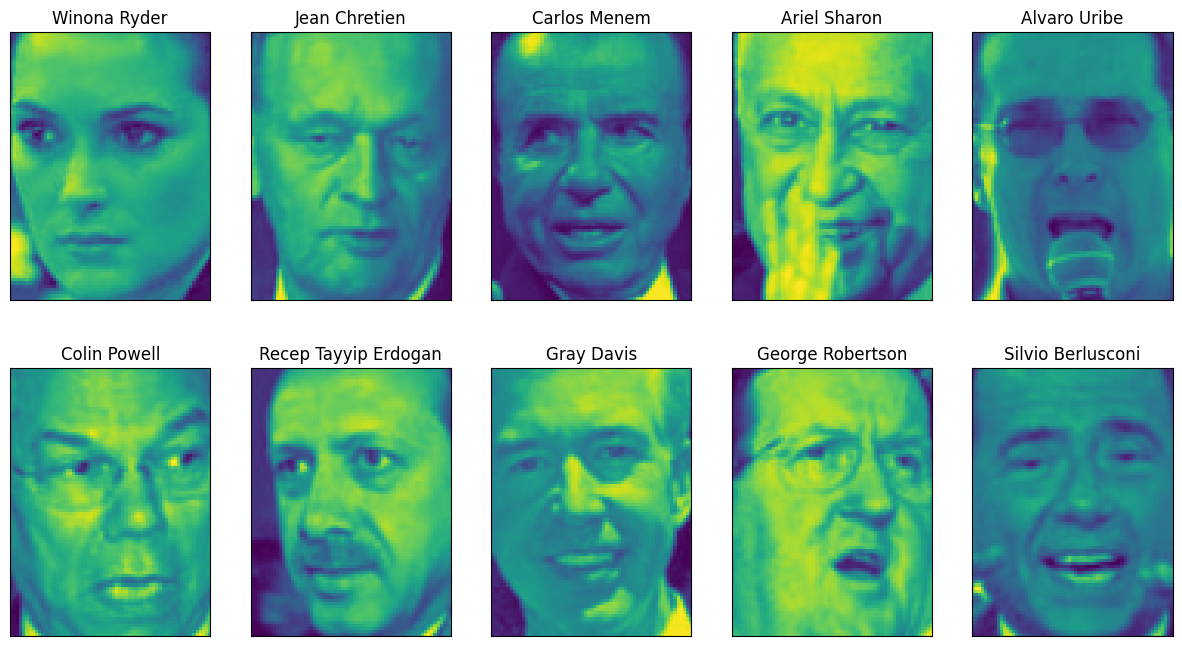

In [46]:
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [41]:
print(f'Total images and their shape: {people.images.shape}')
print(f'No of classes: {len(people.target_names)}')

Total images and their shape: (3023, 87, 65)
No of classes: 62


How often each target appears

In [51]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f'{name:25} {count:3}', end='     ')
    if (i+1) % 3 == 0:
        print()
    

Alejandro Toledo           39     Alvaro Uribe               35     Amelie Mauresmo            21     
Andre Agassi               36     Angelina Jolie             20     Ariel Sharon               77     
Arnold Schwarzenegger      42     Atal Bihari Vajpayee       24     Bill Clinton               29     
Carlos Menem               21     Colin Powell              236     David Beckham              31     
Donald Rumsfeld           121     George Robertson           22     George W Bush             530     
Gerhard Schroeder         109     Gloria Macapagal Arroyo    44     Gray Davis                 26     
Guillermo Coria            30     Hamid Karzai               22     Hans Blix                  39     
Hugo Chavez                71     Igor Ivanov                20     Jack Straw                 28     
Jacques Chirac             52     Jean Chretien              55     Jennifer Aniston           21     
Jennifer Capriati          42     Jennifer Lopez             21     Jerem

capping the image count per class to 50

In [57]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scaling the grayscale values to be between 0 & 1
X_people = X_people/255

## KNN Model Performance

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f'Test set score of 1-nn: {knn.score(X_test, y_test):.3f}')

Test set score of 1-nn: 0.215


Not bad for 62-class classification prob. as random guessing would give accuracy of 1/62 (1.6%)

## applying PCA

In [65]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train_pca shape: {X_train_pca.shape}')

X_train_pca shape: (1547, 100)


In [66]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(f'Test set score of 1-nn: {knn.score(X_test_pca, y_test):.3f}')

Test set score of 1-nn: 0.297


Visualizing PCs

In [70]:
print(f'Shape of PCs: {pca.components_.shape}')

Shape of PCs: (100, 5655)


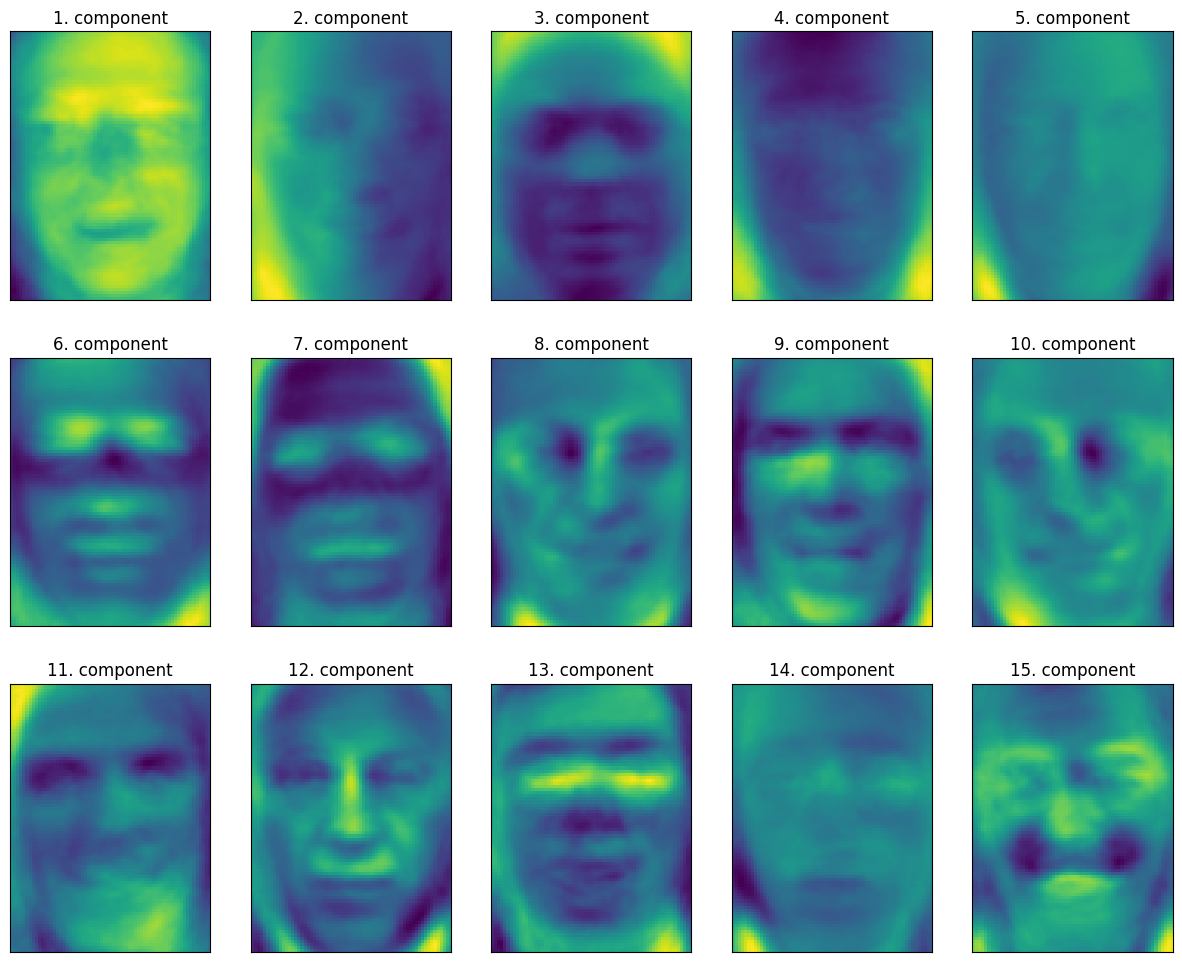

In [72]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f'{i+1}. component')

Text(0, 0.5, 'Second principal component')

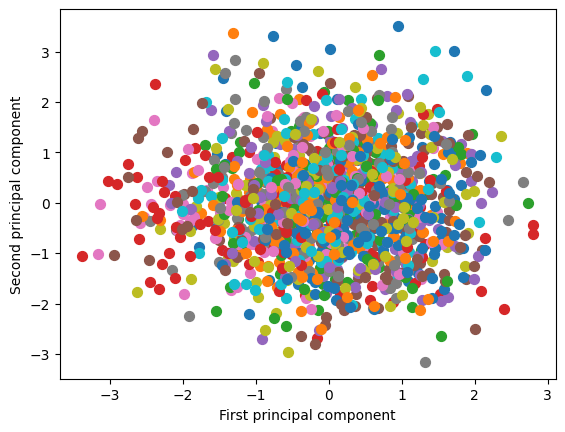

In [76]:
plot_scatter_pca(X_train_pca[:, :2], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# Non-Negative Matrix Factorization (NMF)

c:\Users\akuka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


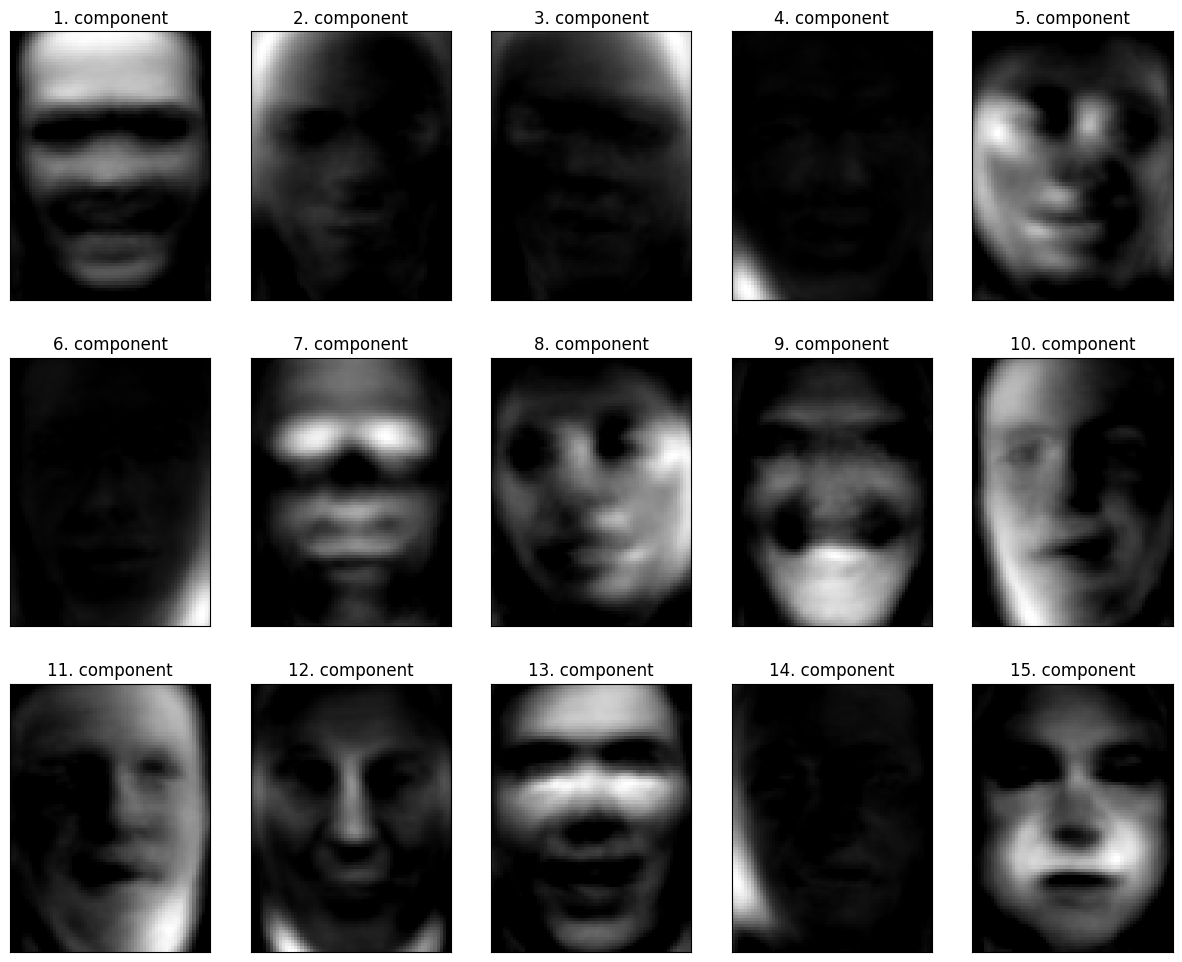

In [84]:
nmf = NMF(n_components=15, random_state=0, max_iter=500)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                       subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='gray')
    ax.set_title(f'{i+1}. component')

 images for which components 8 and 11 are particularly strong

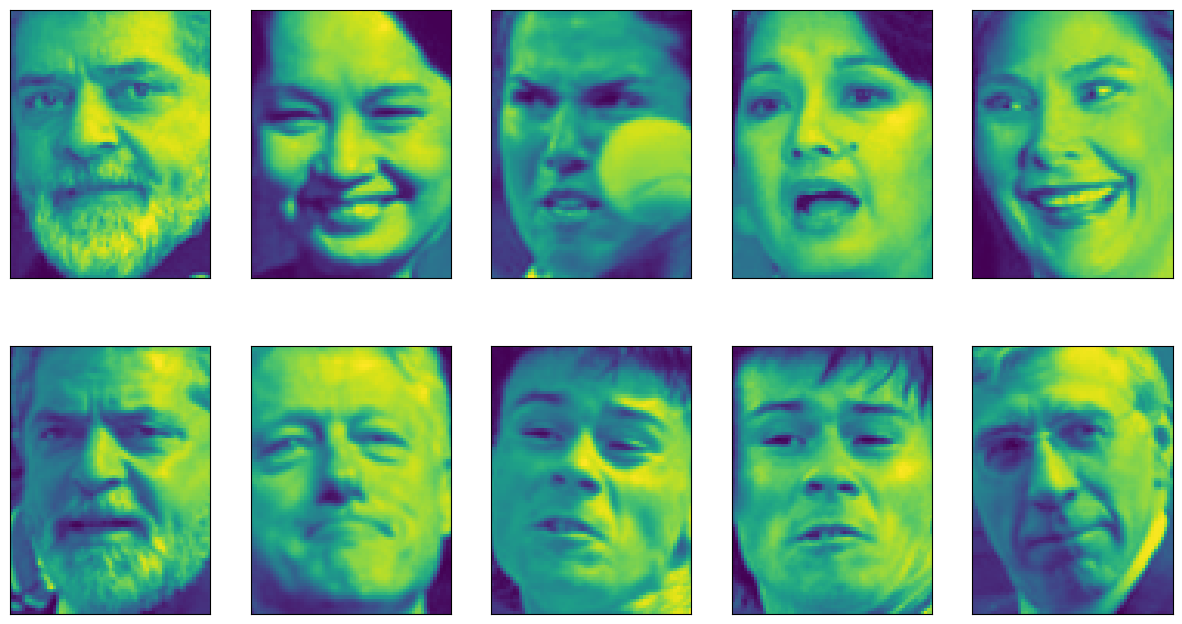

In [ ]:
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


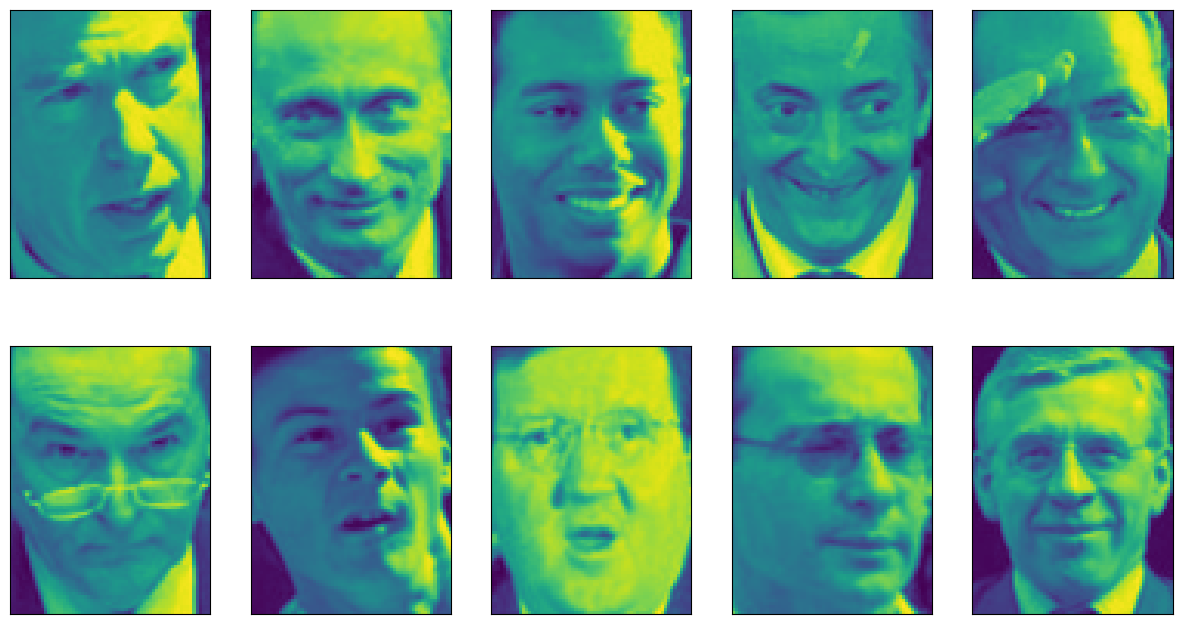

In [89]:
compn = 10
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

# Extracting Pattern using NMF

Text(0, 0.5, 'Signal')

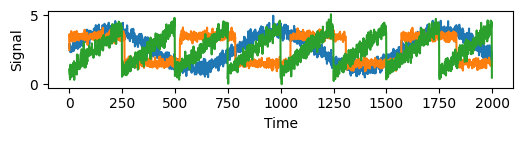

In [91]:
S = make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [92]:
S

array([[2.65408203, 2.48908887, 1.07757433],
       [2.94981947, 3.45507031, 0.79929765],
       [2.97649958, 3.65235694, 0.73473133],
       ...,
       [2.22337048, 1.33481395, 4.31421863],
       [2.36722058, 1.56522921, 4.53698235],
       [1.77945297, 1.62362822, 0.47660599]], shape=(2000, 3))

mix data into 100-dimensional state

Assumption - data from 100 measurement devices

In [96]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(f'Shape of measurements: {X.shape}')

Shape of measurements: (2000, 100)


In [97]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(f'Recovered signal shape: {S_.shape}')

Recovered signal shape: (2000, 3)


Comparing to PCA

In [98]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [99]:
models = [X, S, S_, H]
names = ['Observations (1st 3 measurements)', 'True signal', 'NMF recovered signal', 'PCA recovered signal']

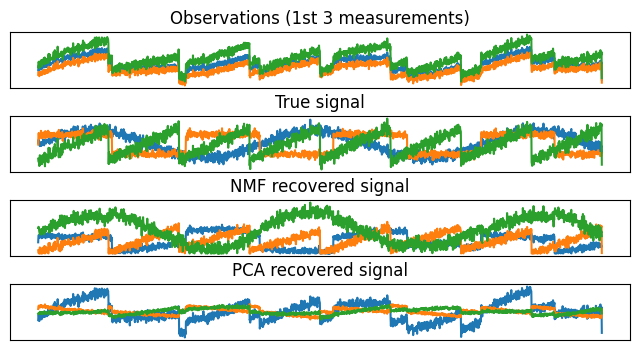

In [102]:
fig, axes = plt.subplots(4, figsize=(8, 4), 
                         gridspec_kw={'hspace': 0.5},
                         subplot_kw={'xticks':(), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')


# Manifold Learning with t-SNE

## Handwritten digits dataset

In [103]:
from sklearn.datasets import load_digits
digits = load_digits()

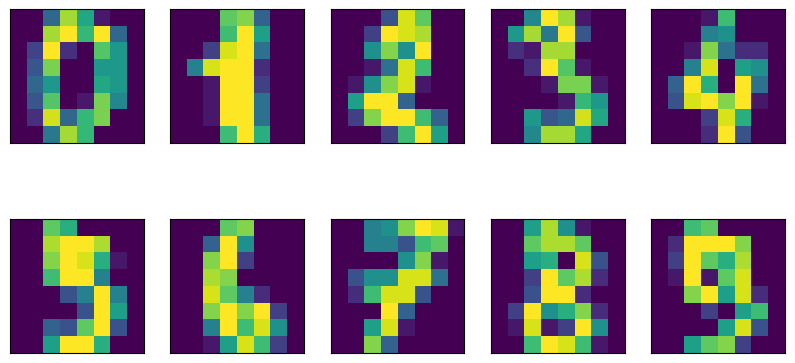

In [104]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [108]:
digits.data.shape

(1797, 64)

## Visualizing with PCA

In [109]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)

In [111]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

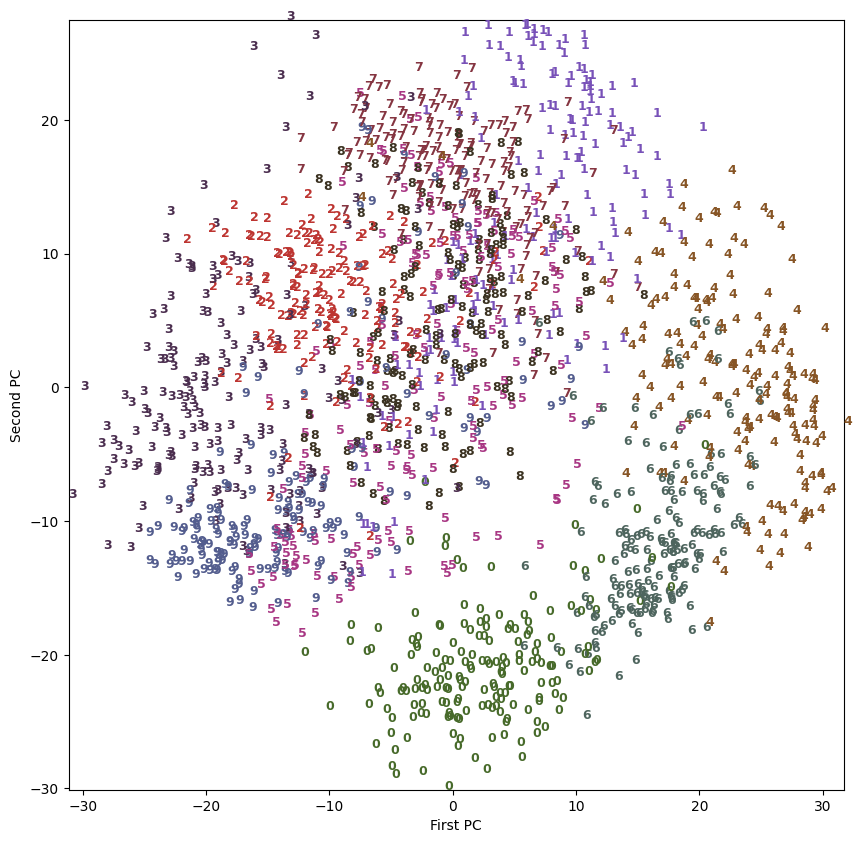

In [112]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel('First PC')
    plt.ylabel('Second PC')

## Visualizing with t-SNE

In [113]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

digits_tsne = tsne.fit_transform(digits.data)

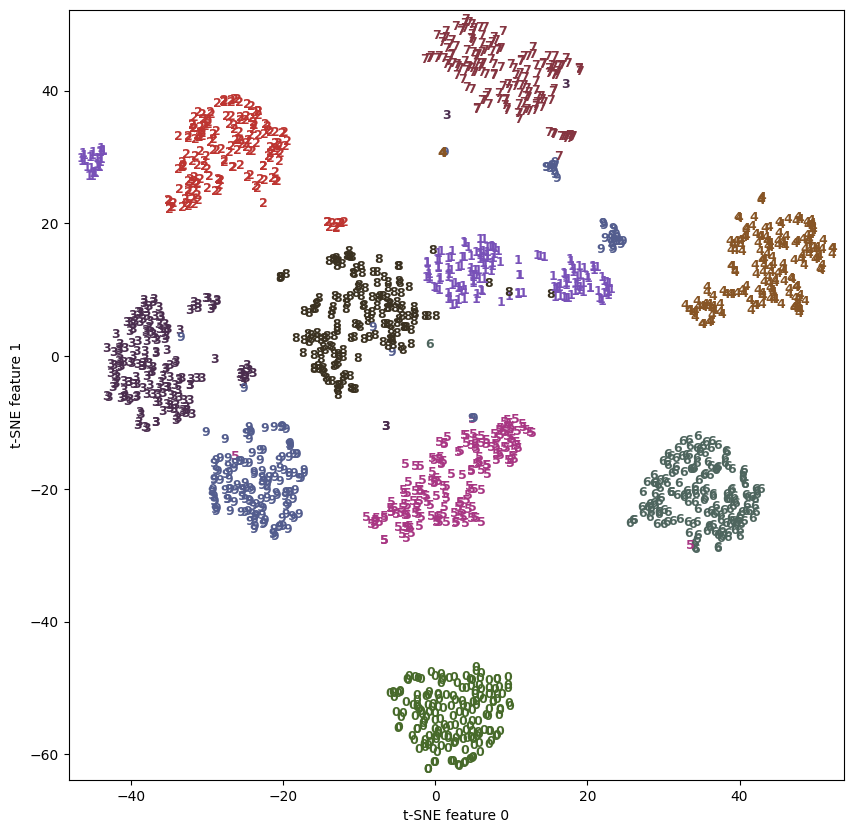

In [116]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min() - 1, digits_tsne[:, 0].max() + 2)
plt.ylim(digits_tsne[:, 1].min() - 1, digits_tsne[:, 1].max() + 2)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel('t-SNE feature 0')
    plt.ylabel('t-SNE feature 1')